In [103]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.callbacks import EarlyStopping

from sklearn.metrics import accuracy_score

In [3]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


**The train_images and train_labels arrays are the training set—the data the model uses to learn.**

**The model is tested against the test set, the test_images, and test_labels arrays.**

**The images are 28x28 NumPy arrays, with pixel values ranging between 0 and 255. The labels are an array of integers, ranging from 0 to 9.**

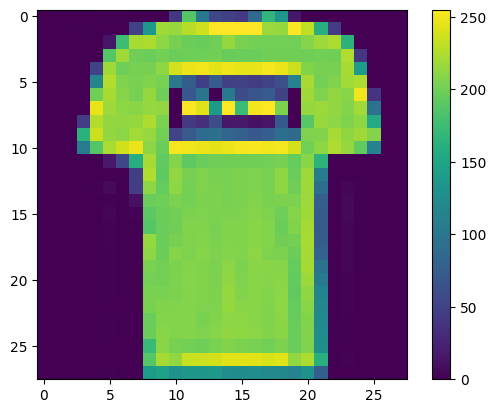

In [21]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

**All the pexels are in the range of 0 - 255**

In [11]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# **Explore the data**
**Let's explore the format of the dataset before training the model. The following shows there are 60,000 images in the training set, with each image represented as 28 x 28 pixels:**

In [18]:
print(train_images.shape)
print(train_labels.shape)

# Each label is an integer between 0 and 9
print(train_labels)

print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
[9 0 0 ... 3 0 5]
(10000, 28, 28)
(10000,)


# **Preprocessing The Data**

**We will scale these values to a range of 0 to 1 by dividing the values by 255. It's important that the training set and the testing set are preprocessed in the same way**

In [22]:
train_images = train_images / 255.0

test_images = test_images / 255.0

# **Displaying First 30 images**

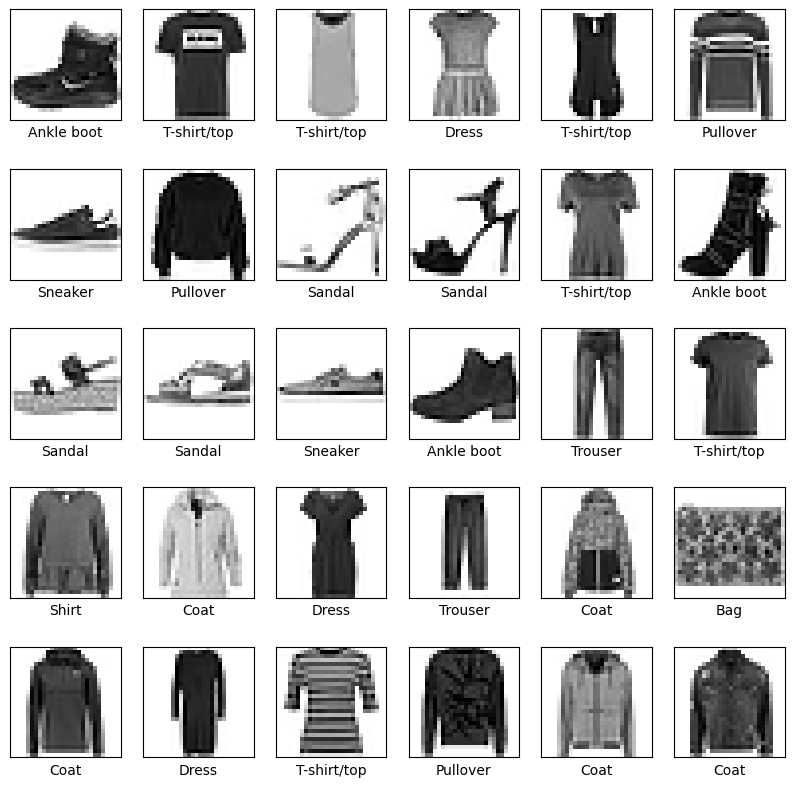

In [24]:
plt.figure(figsize=(10,10))
for i in range(30):
    plt.subplot(5,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

# **Model Creation**

In [86]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [87]:
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_9 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [88]:
# Compiling the model
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [89]:
# Fitting the model
history = model.fit(train_images, train_labels, epochs = 100, validation_split = 0.1, callbacks=[early_stopping], shuffle = True)

Epoch 1/100
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.6651 - loss: 0.9343 - val_accuracy: 0.8440 - val_loss: 0.4373
Epoch 2/100
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8129 - loss: 0.5253 - val_accuracy: 0.8577 - val_loss: 0.4041
Epoch 3/100
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8281 - loss: 0.4797 - val_accuracy: 0.8582 - val_loss: 0.3863
Epoch 4/100
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8379 - loss: 0.4487 - val_accuracy: 0.8598 - val_loss: 0.3771
Epoch 5/100
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8484 - loss: 0.4276 - val_accuracy: 0.8683 - val_loss: 0.3596
Epoch 6/100
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8508 - loss: 0.4212 - val_accuracy: 0.8693 - val_loss: 0.3581
Epoch 7/100
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8527 - loss: 0.4080 - val_accuracy: 0.8642 - val_loss: 0.3707
Epoch 8/100
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8594 - loss: 

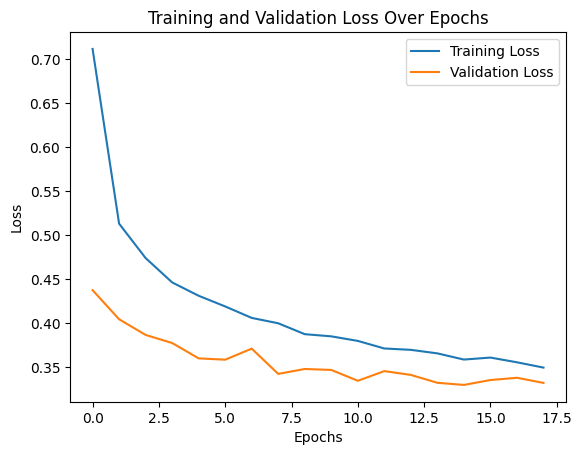

In [90]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')

# Add title and labels
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')

# Add legend
plt.legend()

# Show plot
plt.show()

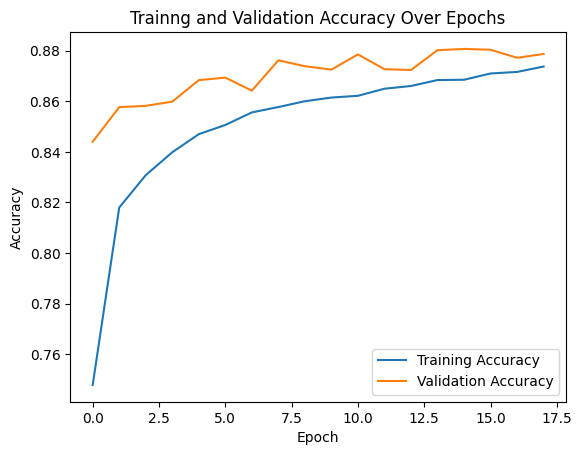

In [91]:
plt.plot(history.history['accuracy'], label = 'Training Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')

plt.title('Trainng and Validation Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.legend()
plt.show()

In [92]:
y_pred_prob = model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [105]:
y_hat = y_pred_prob.argmax(axis = 1)

accuracy_score(test_labels, y_hat)

0.8762

In [98]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8752 - loss: 0.3479
Test accuracy: 0.8762000203132629
Test loss: 0.3490636348724365


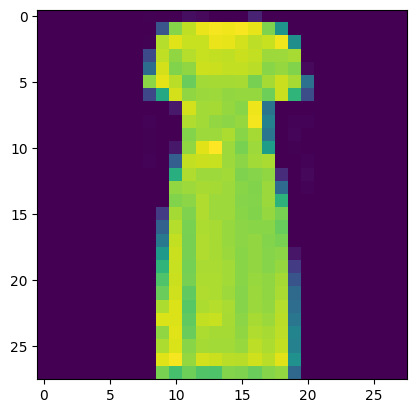

In [106]:
plt.imshow(train_images[50])

# **Making a random prediction using a samples from test set**

In [115]:
y_prob = model.predict(test_images[50].reshape(1, 28, 28))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


In [116]:
y_prob.argmax(axis = 1)

array([4])

**Model says it belongs to class 4**

In [117]:
test_labels[50]

4

**The actual label of test_images[50] is 4, which corresponds to our models prediction!**